In [ ]:
#time series analysis (you have data with respect to time)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("D:/Downloads/airline-passengers (1).csv",sep= ",")
print(df)

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


In [18]:
df.describe() #table form

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [70]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [34]:
df["Month"]

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [35]:
df["Month"] = pd.to_datetime(df["Month"]) #convert months into datetime

In [36]:
print(df.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


In [38]:
df1=df.set_index("Month")
print(df1)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


Text(0, 0.5, 'No of passenger')

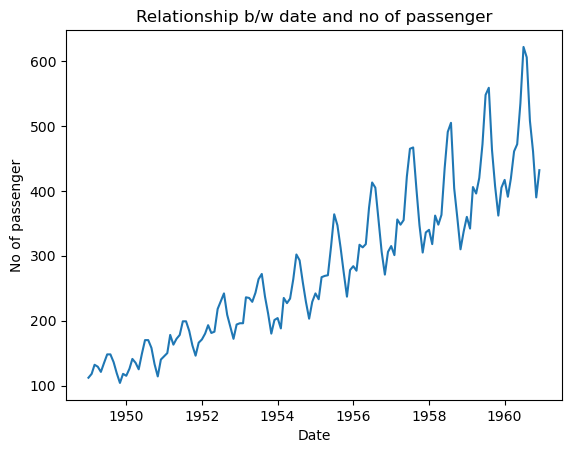

In [41]:
#plot graph b/w date and no of passenger
plt.plot(df1)
plt.title("Relationship b/w date and no of passenger")
plt.xlabel("Date")
plt.ylabel("No of passenger")

In [43]:
#4 month moving average
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima.model import ARIMA

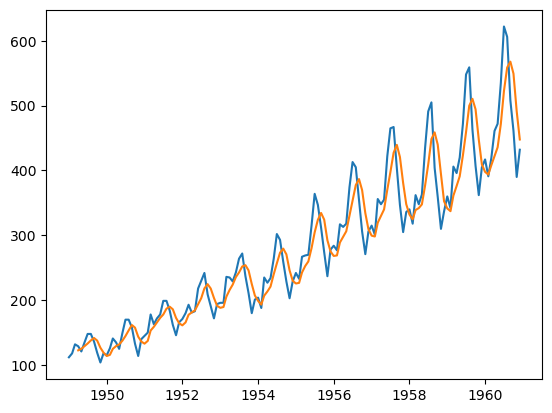

In [44]:
four_month_moving_avg = df1.rolling(window=4).mean()
plt.plot(df1)
plt.plot(four_month_moving_avg)

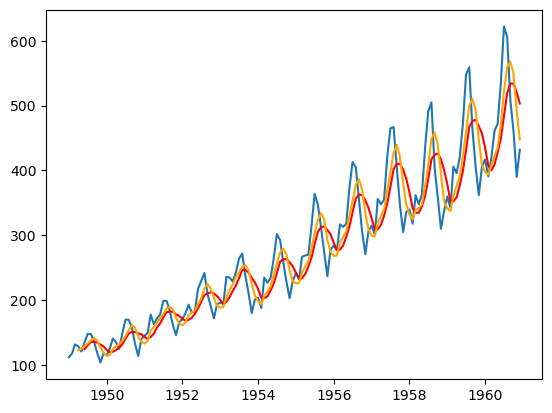

In [48]:
#6 month moving average
six_month_moving_avg = df1.rolling(window=6).mean()
plt.plot(df1)
plt.plot(six_month_moving_avg , color="Red")
plt.plot(four_month_moving_avg , color="orange")

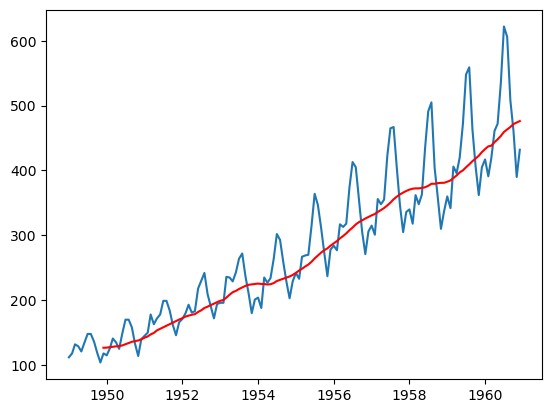

In [58]:
#12 month moving average
twel_month_moving_avg = df1.rolling(window=12).mean()
plt.plot(df1)
plt.plot(twel_month_moving_avg , color="Red")


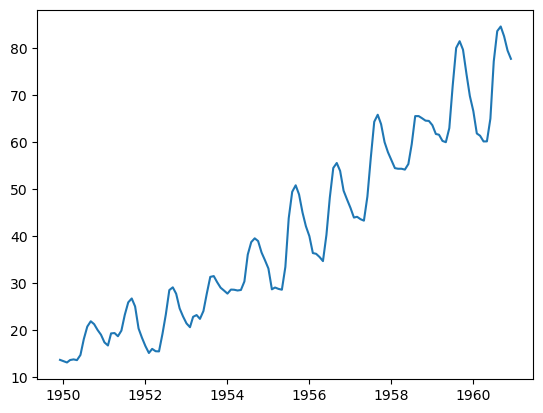

In [51]:
#std dev graph for 12 months moving avg
rolstd=df1.rolling(window=12).std()
plt.plot(rolstd)

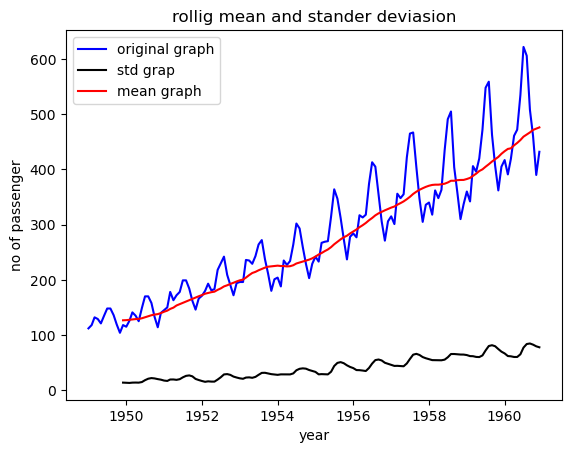

In [62]:
plt.plot(df1 , label= "original graph",color="blue")
plt.plot(rolstd, color="black",label= "std grap")
plt.plot(twel_month_moving_avg , color="red",label= "mean graph")
plt.legend()
plt.title("rollig mean and stander deviasion")
plt.xlabel("year")
plt.ylabel("no of passenger")
plt.show()

In [63]:
df1

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [66]:
df1_logscale = np.log(df1) # convert data into log form
print(df1_logscale)

            Passengers
Month                 
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
...                ...
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426

[144 rows x 1 columns]


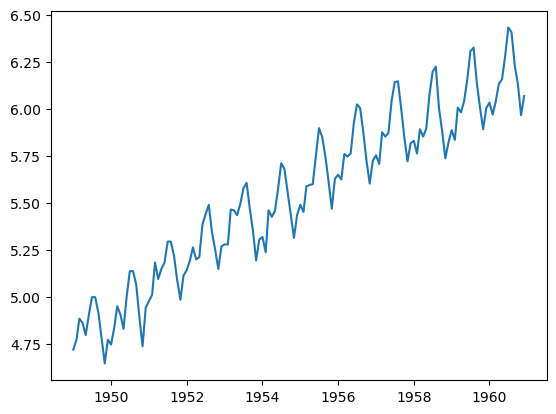

In [67]:
plt.plot(df1_logscale)

In [68]:
decompose = seasonal_decompose(df1)
decompose

Text(0.5, 0.98, 'Decompomstion of time series data')

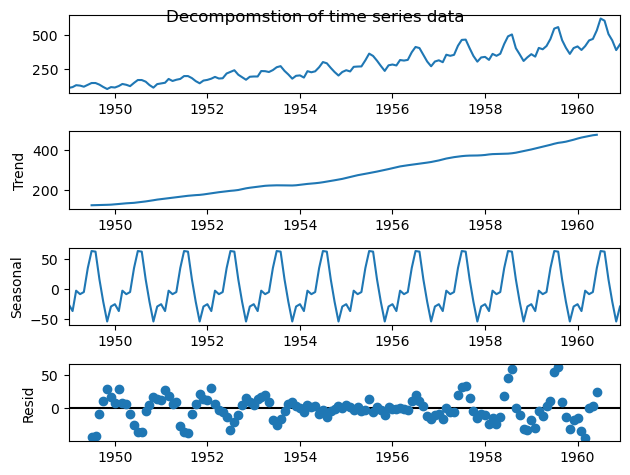

In [71]:
decompose.plot()
plt.suptitle("Decompomstion of time series data")